# Urval
När vi vill göra undersökningar eller mätningar av något så är det oftast in görbart att undersöka en hel population. Därför måste vi göra ett urval av populationen. Hur vi gör detta är viktigt för att få en bra skattning av populationen.

## Vikten av slumpmässiga urval (urvalsbias)
Det är viktigt att vi gör slumpmässiga urval. Om vi inte gör det så kan vi få ett urval som inte är representativt för populationen. Detta kan leda till att vi får felaktiga slutsatser om populationen.

Ett snedfördelat urval kan uppstå på många olika sätt:
* Urvalet kan vara icke-representativt för populationen på grund av att vi har valt ut individer på ett icke-representativt sätt. Till exempel kan vi ha valt ut individer som är lättillgängliga, eller individer som är lätt att få kontakt med.
* Svarsbortfall kan uppstå om individer väljer att inte svara på frågorna. Detta kan bero på att individen inte vill svara på frågorna, eller att individen inte förstår frågorna.
* Mätfel i form av att individen svarar felaktigt på frågorna. Eller att utrustningen som används för att mäta något inte fungerar korrekt/används felaktigt.
* Mätningarna inte är oberoende av varandra. Till exempel kan vi mäta samma individ flera gånger, eller så kan vi mäta individer som är nära varandra i populationen. T.ex. en grupp individer som bor i samma område eller som kommer tillsammans till en undersökning. 
* Bearbetningsfel. Detta kan t.ex. uppstå om vi räknar fel på något sätt, eller om vi använder felaktiga statistiska metoder för att analysera data.


### Exempel

Vi vill undersöka längden på invånarna i Karlskrona. Vi gör en undersökning med 10000 personer. Till intervjuerna kommer 8000 kvinnor och 2000 män. 

Om vi gör antagandet att fördelningen av män och kvinnor i Karlskrona är ungefär 50/50 så har vi nu råkat få ett snedfördelat underlag. Detta brukar bero på att vår process för att sampla in data inte har lyckats attrahera alla grupper som vi är intresserade av på ett representativt sätt. Det vi är ute efter är att få ett urval som är så slumpmässigt som möjligt, vilket i sin tur leder till att vi får ett urval som är så representativt som möjligt.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

nbr_males = 2000
nbr_females = 8000

female_heights = np.random.normal(loc = 165.5, scale = 6, size = nbr_females)
male_heights = np.random.normal(loc = 178.9, scale = 7, size = nbr_males)

all_heights = np.append(female_heights, male_heights)
all_genders = ['F'] * nbr_females + ['M'] * nbr_males

df = pd.DataFrame({'Gender': all_genders, 'Height': all_heights})
df.head()

,Gender,Height
0,F,174.510213
1,F,166.326348
2,F,165.337859
3,F,165.500167
4,F,169.006650


Om vi plottar vårt urval så ser det ut så här:

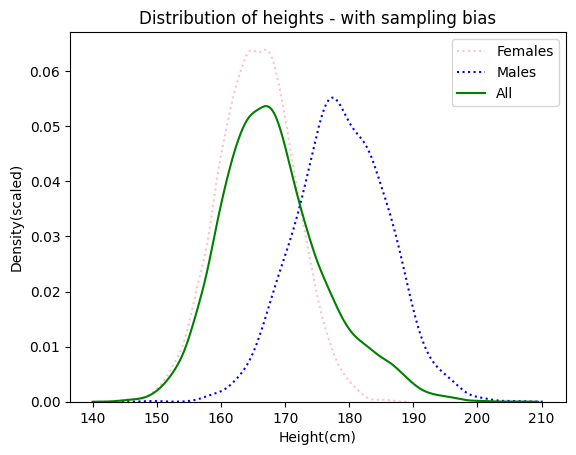

In [50]:
plt.figure()
sns.distplot(pd.Series(female_heights, name = "Height(cm)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(male_heights, name = "Height(cm)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(all_heights, hist = False, label = "All", 
             color = 'green')

plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of heights - with sampling bias')
plt.legend()
plt.show()

Om vi skulle dra slutsatser från denna skulle vi antagligen underskatta längden på män i Karlskrona. 

#### Hur kan vi få ett slumpmässigt urval?

Ett sätt är att vikta våra datapunkter och sedan göra ett nytt urval.

In [51]:
def set_weight(row):
    if row['Gender'] == 'F':
        row['Weight'] = 0.25
    else:
        row['Weight'] = 1
    return row

df_with_weights = df.apply(set_weight, axis = 1)
df_with_weights.head()

,Gender,Height,Weight
0,F,174.510213,0.25
1,F,166.326348,0.25
2,F,165.337859,0.25
3,F,165.500167,0.25
4,F,169.006650,0.25


Vi gör ett nytt urval med `DataFrame.sample(..., weights=...)` där vi ger vikterna från kolumnen `Weight` för att vikta urvalet till att bli närmare $50/50$.

In [53]:
sample = df_with_weights.sample(n=1000, weights='Weight')
print('Number of males: ', sample[sample.Gender == 'M'].shape[0])
print('Number of females: ', sample[sample.Gender == 'F'].shape[0])

Number of males:  497
Number of females:  503


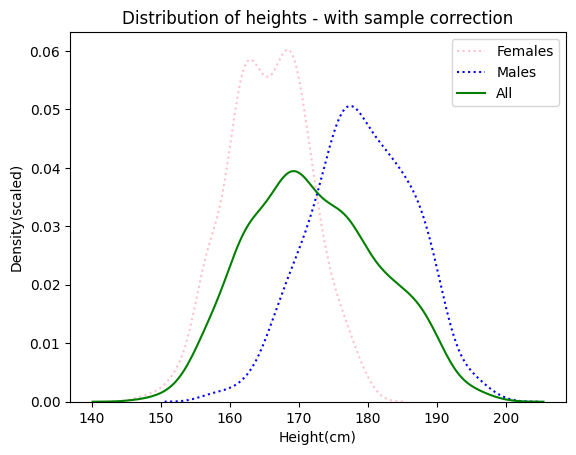

In [54]:
plt.figure()
sns.distplot(pd.Series(sample[sample.Gender == 'F'].Height, name = "Height(cm)"), hist = False, label = "Females",
             color='pink', kde_kws={'linestyle': 'dotted'})
sns.distplot(pd.Series(sample[sample.Gender == 'M'].Height, name = "Height(cm)"), hist = False, label = "Males", 
             color = 'blue', kde_kws={'linestyle': 'dotted'})
sns.distplot(sample.Height, hist = False, label = "All", 
             color = 'green')

plt.gca().set_xlabel('Height(cm)')
plt.gca().set_ylabel('Density(scaled)')
plt.gca().set_title('Distribution of heights - with sample correction')
plt.legend()
plt.show()